<a href="https://colab.research.google.com/github/kgudalewski/Stocks_analysis/blob/main/AAPL_stock_brief_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# !pip install yfinance==0.2.52
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# eda

In [76]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"
# start_date = (datetime.datetime.now() - datetime.timedelta(days=4*365)).strftime("%Y-%m-%d")
# end_date = (datetime.datetime.now()).strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)
data = data.droplevel(1,axis=1)

[*********************100%***********************]  1 of 1 completed


In [77]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [79]:
data.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,152.099694,153.628459,150.393243,151.942834,9.061449e+07
std,41.998935,42.137927,41.773141,41.938210,5.325627e+07
min,54.449886,55.452152,51.595983,55.350227,2.323470e+07
25%,126.916946,128.007173,124.891233,126.388676,5.546960e+07
50%,150.734451,152.492157,148.730111,150.559428,7.629970e+07
75%,176.675110,178.382589,175.237269,176.521181,1.077601e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


In [80]:
data['Daily_Return'] = data['Close'].pct_change()
data['Rolling_Mean'] = data['Close'].rolling(window=20).mean()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data["Week"] = [pd.to_datetime(date).week for date in data.index]
data["Year"] = [pd.to_datetime(date).year for date in data.index]

def fix_weeks(row):
  if pd.to_datetime(row.name).month == 12 and row.Week == 1:
    return 52
  else:
    return row.Week

data['Week'] = data.apply(fix_weeks, axis=1)


In [81]:
filtered_data = data[data['Daily_Return'] > 0.02]
filtered_data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400,0.021241,NaN,NaN,2.0,2020
2020-01-13,76.737427,76.764062,75.330800,75.449437,121532000,0.021364,NaN,NaN,3.0,2020
2020-01-28,76.914162,77.086054,75.582587,75.681851,162234000,0.028289,NaN,NaN,5.0,2020
2020-01-29,78.524162,79.373951,77.807535,78.550798,216229200,0.020932,NaN,NaN,5.0,2020
2020-02-04,77.194992,77.386257,75.931207,76.337940,136616400,0.033014,76.022854,0.018808,6.0,2020


In [82]:
def range_fn(x):
    return x.max() - x.min()

aggregated_df = data.groupby(['Year','Week'])['Close'].agg(['mean', 'min', 'max', range_fn])
aggregated_df.head()

mean        min        max  range_fn
Year Week                                           
2020 1.0   72.362591  72.009109  72.716072  0.706963
     2.0   73.664636  72.241547  75.132271  2.890724
     3.0   76.260478  75.376808  77.165947  1.789139
     4.0   76.977711  76.642998  77.287003  0.644005
     5.0   76.716124  74.798180  78.524162  3.725983

In [83]:
data.loc[((data.Year == 2024) & (data.Week == 1)) | ((data.Year == 2024) & (data.Week == 52))]
# check whether bad week description appears

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700,-0.035787,192.870526,0.012075,1.0,2024
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500,-0.007488,192.613073,0.012014,1.0,2024
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600,-0.012700,192.041009,0.011036,1.0,2024
2024-01-05,180.098694,181.669266,179.094727,180.903872,62303300,-0.004013,191.487332,0.011021,1.0,2024
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,0.003065,244.757892,0.008893,52.0,2024
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478,246.023002,0.008828,52.0,2024
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176,247.219685,0.008782,52.0,2024
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,-0.013242,248.251551,0.009615,52.0,2024
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,-0.013263,248.994234,0.010262,52.0,2024


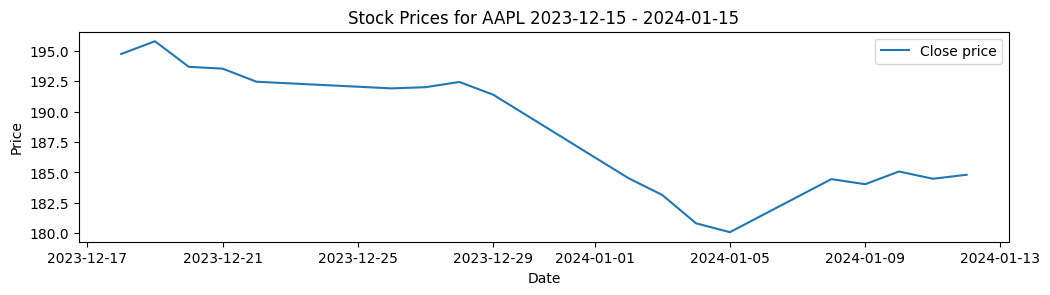

In [84]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data.loc[(data.index < '2024-01-15') & (data.index > '2023-12-15')]['Close'], label='Close price')
plt.title(f'Stock Prices for {ticker} 2023-12-15 - 2024-01-15')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


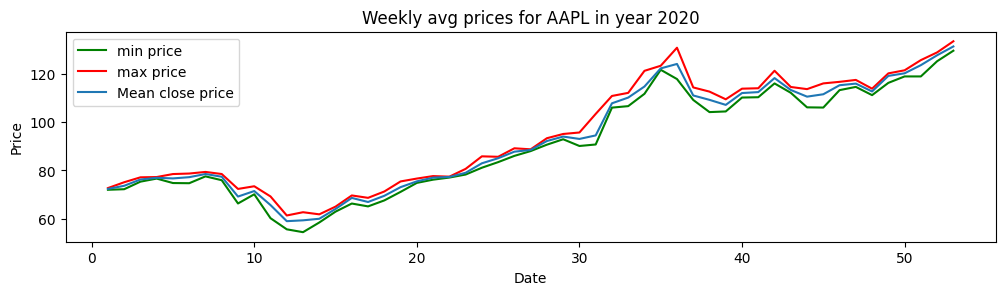

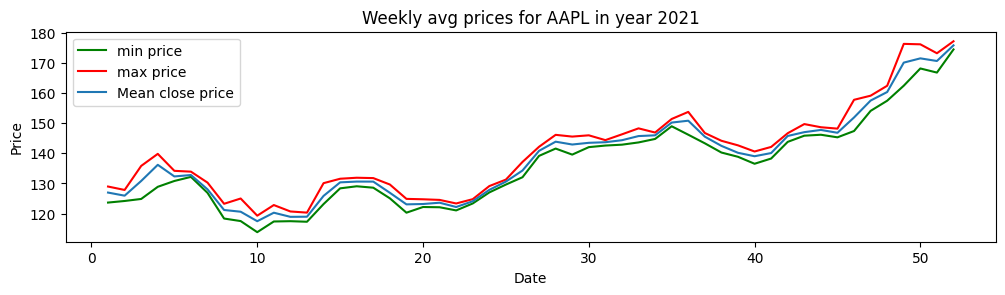

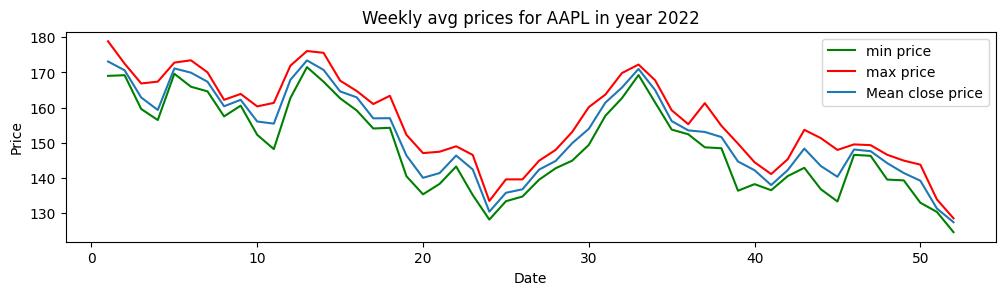

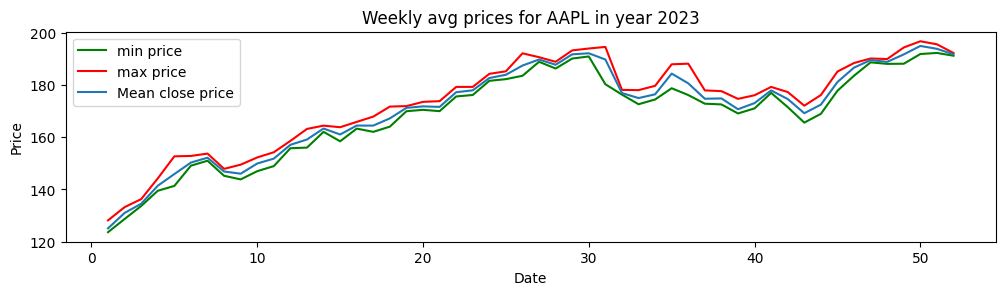

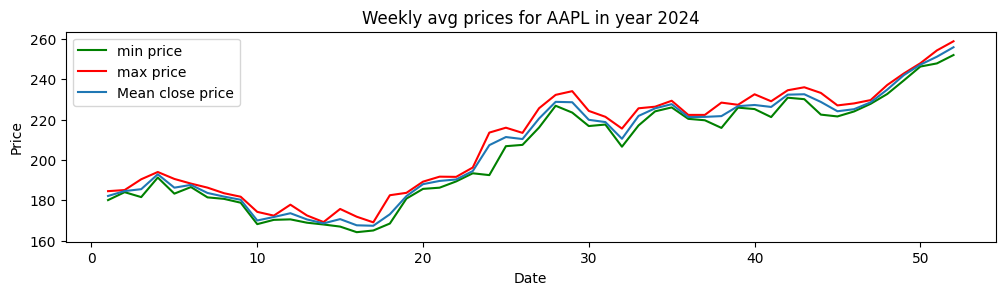

In [85]:
for year in aggregated_df.index.get_level_values('Year').unique():

  year_data = aggregated_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['min'], label='min price', color='green')
  plt.plot(year_data['max'], label='max price', color='red')
  plt.plot(year_data['mean'], label='Mean close price')
  plt.title(f'Weekly avg prices for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

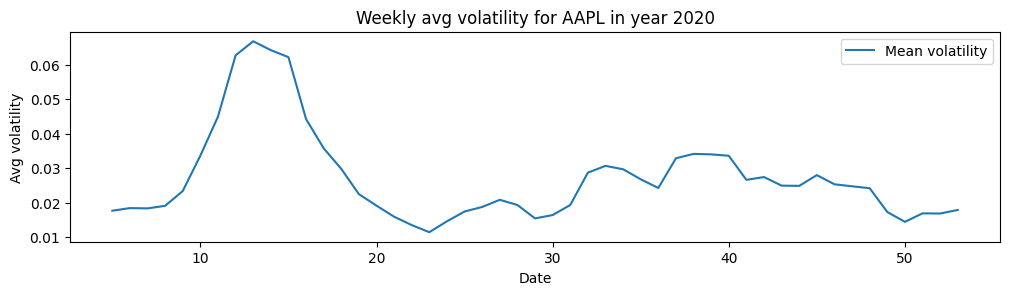

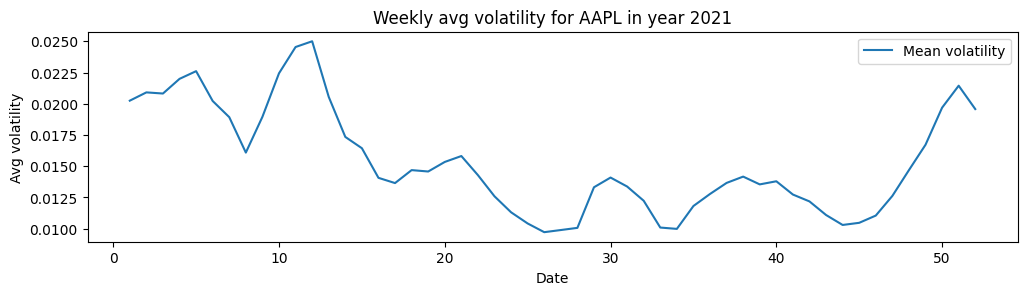

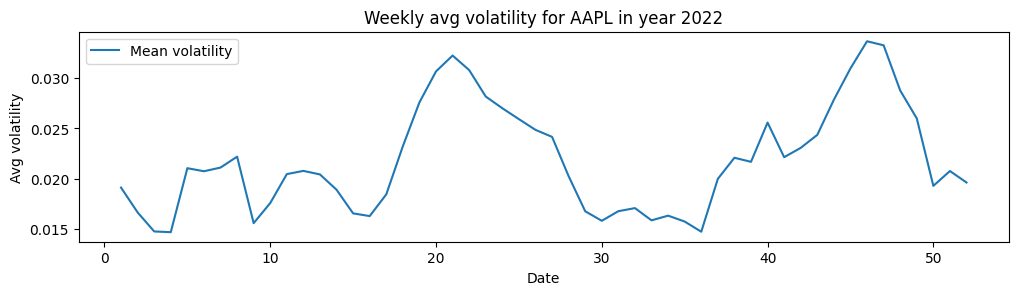

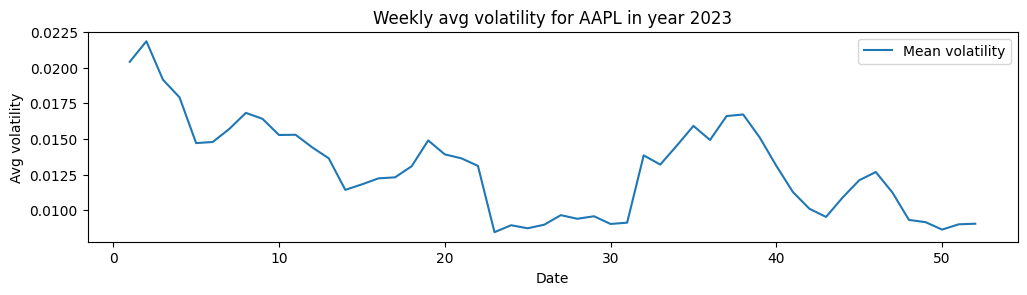

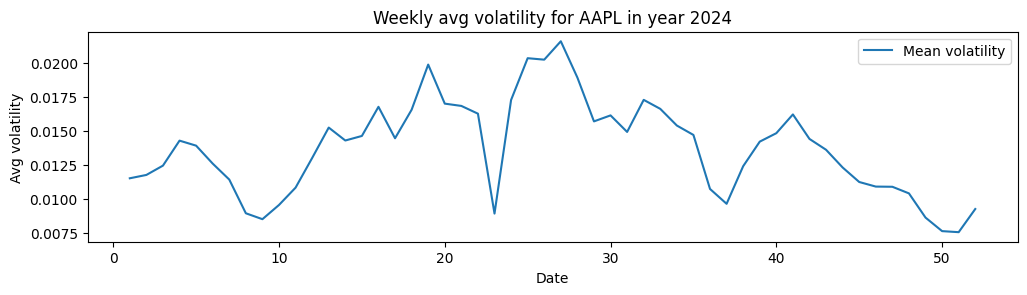

In [86]:
volatility_df = data.groupby(['Year','Week'])['Volatility'].agg(['mean'])

for year in volatility_df.index.get_level_values('Year').unique():

  year_data = volatility_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['mean'], label='Mean volatility')
  plt.title(f'Weekly avg volatility for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Avg volatility')
  plt.legend()
  plt.show()

In [87]:
aggregated_df.groupby(['Year',"Week"])["range_fn"].mean().sort_values(ascending=False).unstack(level='Year')

Year,2020,2021,2022,2023,2024
Week,,,,,
1.0,0.706963,5.323456,9.837860,4.547127,4.433395
2.0,2.890724,3.662926,3.282547,4.557007,1.043732
3.0,1.789139,10.979012,7.262924,2.629440,8.826996
4.0,0.644005,10.939987,10.918915,4.764618,2.743530
5.0,3.725983,3.369904,3.174866,11.367828,7.286270
6.0,4.006836,1.741257,7.518173,3.736557,1.719681
7.0,1.841942,3.404282,5.402451,2.752228,4.817276
8.0,2.565132,4.900993,4.703766,2.663101,2.796799
9.0,6.023277,7.493332,3.335938,5.662888,2.956024


In [88]:
agg_vol_df = volatility_df.groupby(['Year',"Week"])['mean'].mean().sort_values(ascending=False).unstack(level='Year')
agg_vol_df["std_dev_per_week"] = (agg_vol_df.std(axis=1) / agg_vol_df.mean(axis=1)) * 100
# agg_vol_df.sort_values(by="std_dev_per_week", ascending=True, inplace=True)
agg_vol_df.head()

Year,2020,2021,2022,2023,2024,std_dev_per_week
Week,,,,,,
1.0,NaN,0.020250,0.019110,0.020416,0.011536,23.751649
2.0,NaN,0.020912,0.016638,0.021854,0.011782,25.888110
3.0,NaN,0.020821,0.014741,0.019160,0.012468,22.991293
4.0,NaN,0.021996,0.014668,0.017919,0.014306,20.747003
5.0,0.017679,0.022612,0.021043,0.014715,0.013937,21.146367


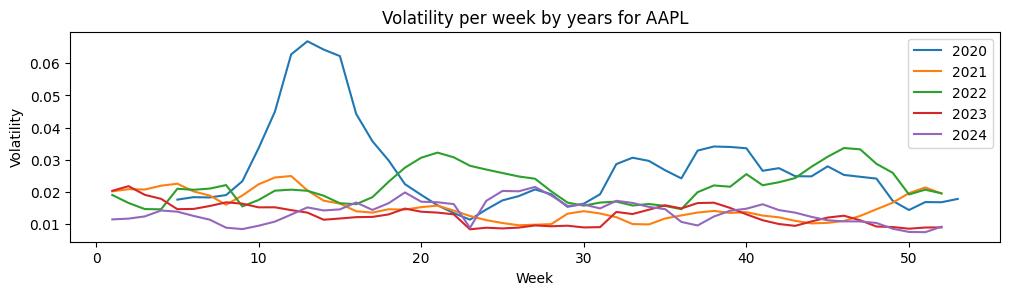

In [89]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot

for year in agg_vol_df.columns[:-1].to_list():
  plt.plot(agg_vol_df[year], label=str(year))

plt.title(f'Volatility per week by years for {ticker}')
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.legend()
plt.show()


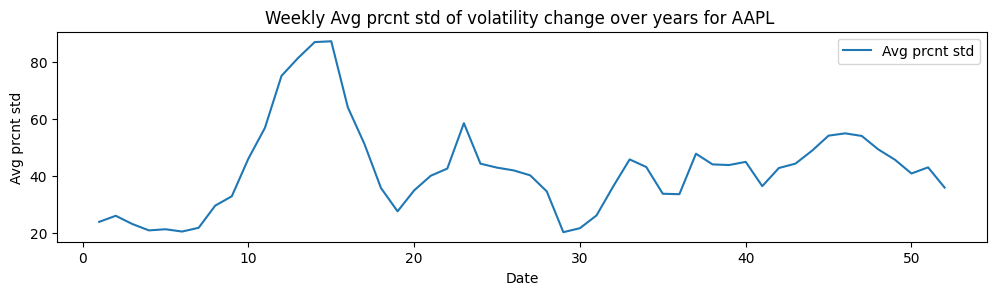

In [90]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(agg_vol_df['std_dev_per_week'], label='Avg prcnt std')
plt.title(f'Weekly Avg prcnt std of volatility change over years for {ticker} ')
plt.xlabel('Date')
plt.ylabel('Avg prcnt std')
plt.legend()
plt.show()

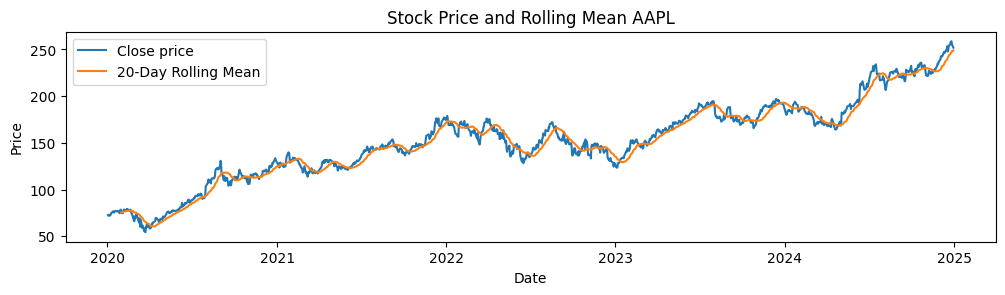

In [91]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data['Close'], label='Close price')
plt.plot(data['Rolling_Mean'], label='20-Day Rolling Mean')
plt.title(f'Stock Price and Rolling Mean {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

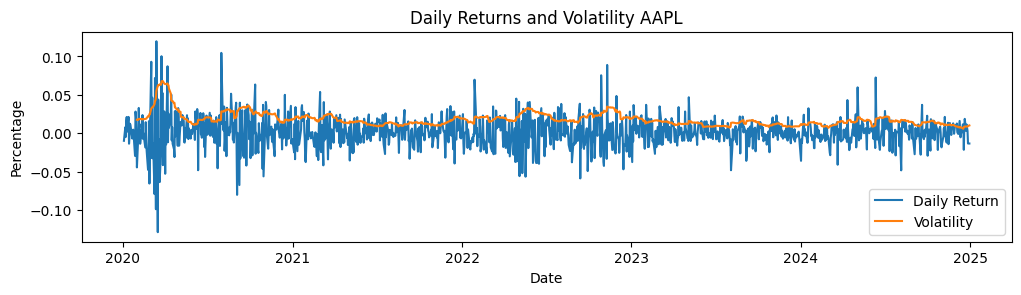

In [92]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(data['Daily_Return'], label='Daily Return')
plt.plot(data['Volatility'], label='Volatility')
plt.title(f'Daily Returns and Volatility {ticker}')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# predictions

In [93]:
data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,NaN,NaN,NaN,1.0,2020
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,-0.009722,NaN,NaN,1.0,2020
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200,0.007968,NaN,NaN,2.0,2020
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000,-0.004703,NaN,NaN,2.0,2020
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,0.016086,NaN,NaN,2.0,2020


In [94]:
# predictions of future close price based on previous row/rows
data['Future_Close'] = data['Close'].shift(-1)

data = data.dropna() # drop last row with nan value

X = data[['Close',"High",'Low', 'Open', 'Rolling_Mean']]
y = data['Future_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    print(f"{model_name}: MSE = {mse} & RMSE = {rmse}")

Linear Regression: MSE = 6.532451265326008 & RMSE = 2.5558660499576282
Decision Tree: MSE = 13.280215555075976 & RMSE = 3.644203006841959
Random Forest: MSE = 7.957714893702886 & RMSE = 2.820942199638781
SVR: MSE = 56.264881376151905 & RMSE = 7.500992026135736
KNN: MSE = 8.38354448182208 & RMSE = 2.895435110967276
Gradient Boosting: MSE = 7.598533996758828 & RMSE = 2.7565438499611843


In [95]:
# for ['Close',"High",'Low', 'Open', "Rolling_Mean", 'Volatility']
# Linear Regression: MSE = 6.450623979174821 & RMSE = 2.539807862649224
# Decision Tree: MSE = 11.406443704864163 & RMSE = 3.377342698759509
# Random Forest: MSE = 7.50141512215098 & RMSE = 2.7388711401142953
# SVR: MSE = 35.99706517544796 & RMSE = 5.999755426302639
# KNN: MSE = 8.070126913352711 & RMSE = 2.8407968799885555
# Gradient Boosting: MSE = 7.503122260259372 & RMSE = 2.739182772335459

# for ['Close',"High",'Low', 'Open', "Rolling_Mean"]
# Linear Regression: MSE = 5.660413135516561 & RMSE = 2.3791622759947586
# Decision Tree: MSE = 12.350181347742579 & RMSE = 3.5142824797876706
# Random Forest: MSE = 6.455012268208142 & RMSE = 2.540671617546853
# SVR: MSE = 50.82316179832419 & RMSE = 7.129036526651003
# KNN: MSE = 6.767069397949932 & RMSE = 2.6013591443608726
# Gradient Boosting: MSE = 6.563887963072319 & RMSE = 2.5620085798202004

# for ['Close',"High",'Low', 'Open']
# Linear Regression: MSE = 7.709232421009728 & RMSE = 2.7765504535321752
# Decision Tree: MSE = 15.718372212083027 & RMSE = 3.9646402374090677
# Random Forest: MSE = 9.287981251384961 & RMSE = 3.0476189478648674
# SVR: MSE = 31.05113038474394 & RMSE = 5.572354115160301
# KNN: MSE = 9.266384821700651 & RMSE = 3.0440737214628446
# Gradient Boosting: MSE = 9.274822851337037 & RMSE = 3.045459382644437

# but the key factor is whether prediction is in valid way compared to previous close price
# (to check if model predict valid direction of stock price)

In [96]:
def prcnt_crrct_dir_guesses(X, y, pred_y):
  def correct_direction(row):
    # checks if predctions are the same way that actual price
    start_close = row['Close']
    if (row['Actual_future_Close'] > start_close) & (row['Predicted_future_Close'] > start_close) :
      return 1
    elif (row['Actual_future_Close'] < start_close) & (row['Predicted_future_Close'] < start_close) :
      return 1
    else:
      return 0


  validation_df = X.copy()
  validation_df['Actual_future_Close'] = y
  validation_df['Predicted_future_Close'] = pred_y
  validation_df['Correct_direction'] = validation_df.apply(correct_direction, axis=1)

  return (validation_df['Correct_direction'].sum() / len(validation_df)) * 100

In [104]:
# predictions of future close price based on previous row/rows
data['Future_Close'] = data['Close'].shift(-1)

data = data.dropna() # drop last row with nan value

X = data[['Close',"High",'Low', 'Open', 'Rolling_Mean']]
y = data['Future_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    dirs_e = prcnt_crrct_dir_guesses(X_test, y_test, predictions)
    print(f"{model_name}: MSE = {mse} | RMSE = {rmse} | PRCNT of correctly guessed directions = {dirs_e}")

Linear Regression: MSE = 6.650403259965232 | RMSE = 2.5788375792137885 | PRCNT of correctly guessed directions = 48.987854251012145
Decision Tree: MSE = 15.086793070825534 | RMSE = 3.8841721216786382 | PRCNT of correctly guessed directions = 44.12955465587044
Random Forest: MSE = 7.939183826784478 | RMSE = 2.817655732481255 | PRCNT of correctly guessed directions = 50.607287449392715
SVR: MSE = 91.04276901809122 | RMSE = 9.541633456494292 | PRCNT of correctly guessed directions = 49.392712550607285
KNN: MSE = 9.828495794822917 | RMSE = 3.1350431886694827 | PRCNT of correctly guessed directions = 51.821862348178136
Gradient Boosting: MSE = 8.25946088454019 | RMSE = 2.8739277799798986 | PRCNT of correctly guessed directions = 48.178137651821864


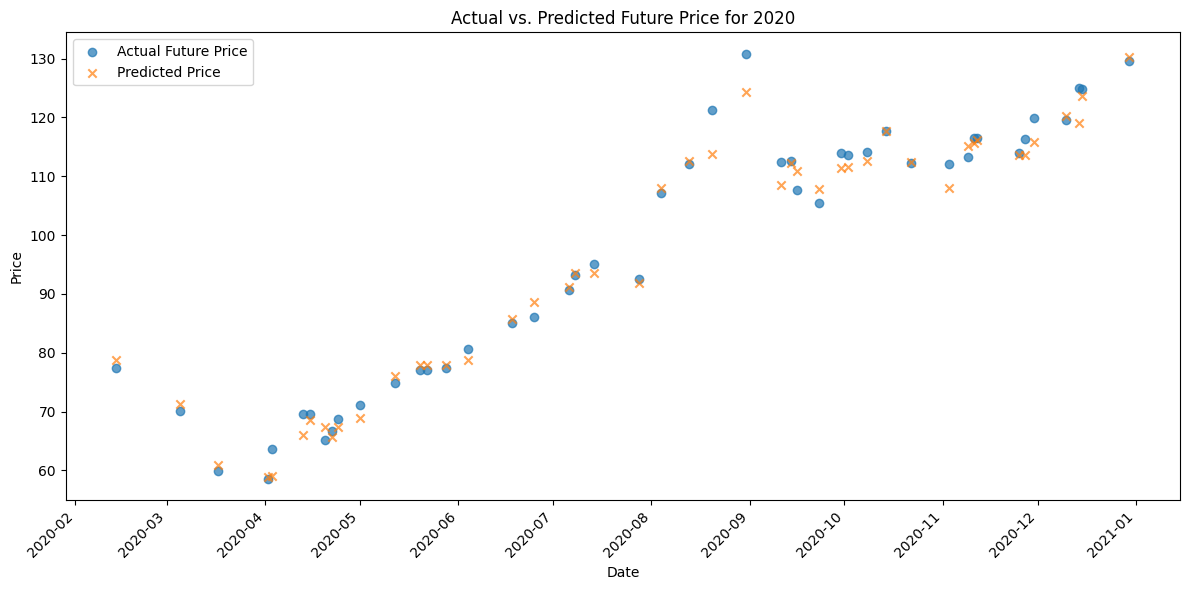

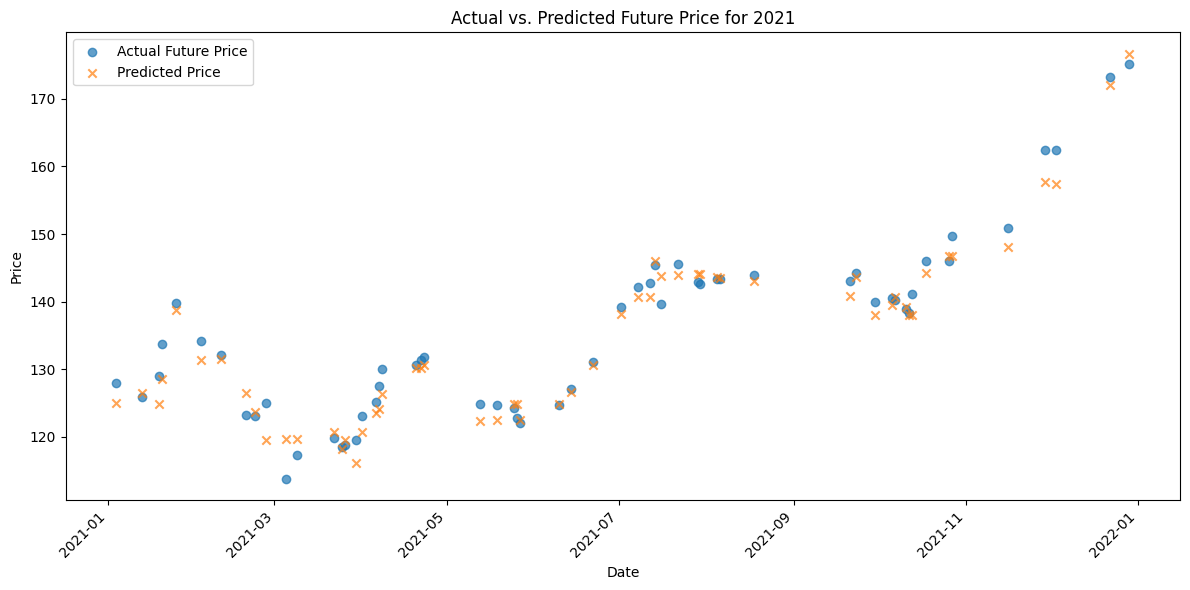

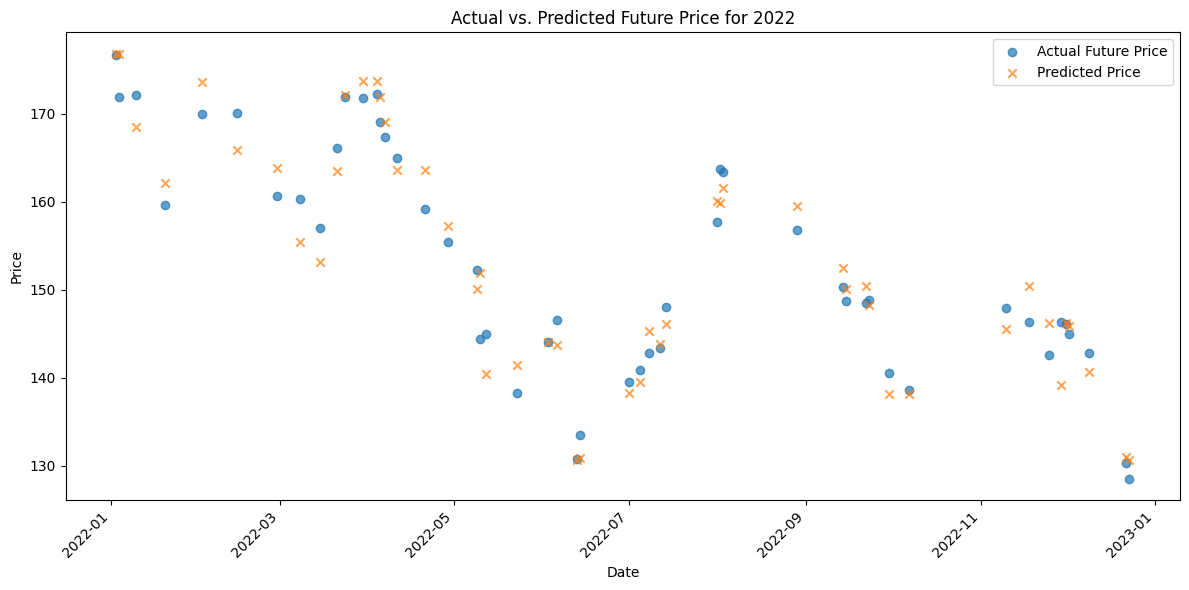

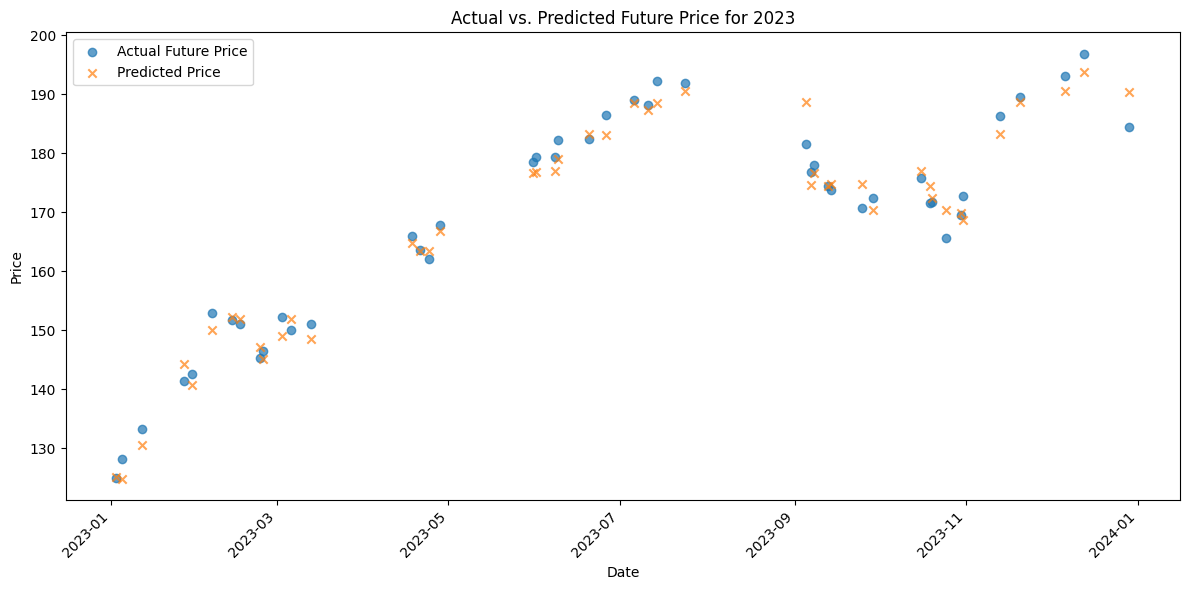

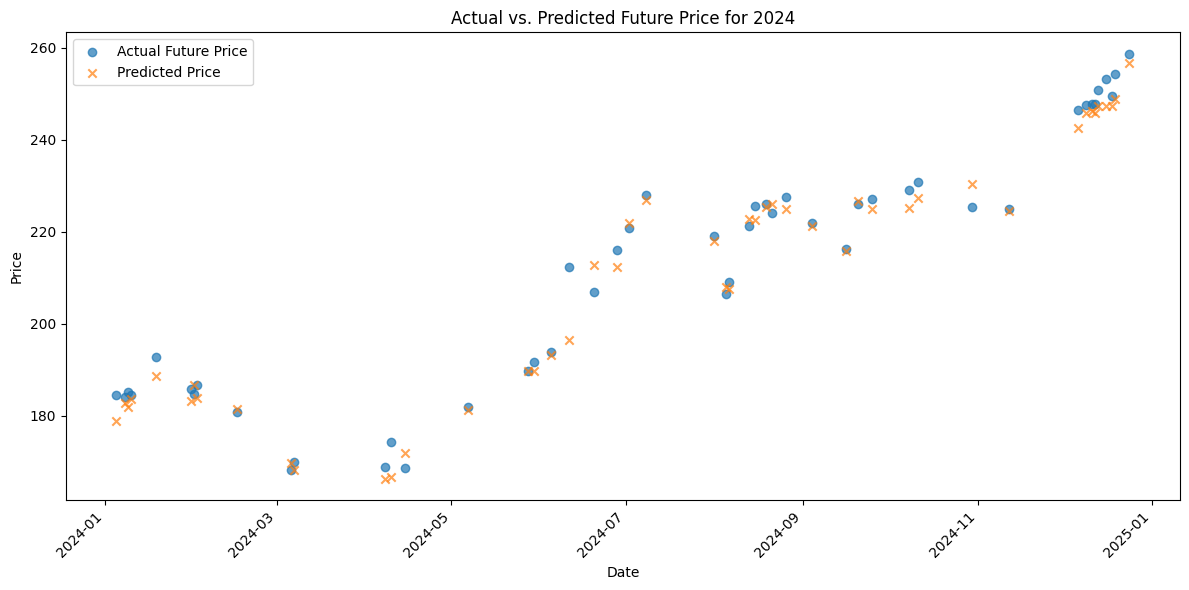

In [143]:
predictions = pd.Series(predictions, index=y_test.index)

for year in sorted(y_test.index.year.unique()):
  year_data = y_test.loc[y_test.index.year == year]
  year_predictions = predictions.loc[predictions.index.year == year]
  plt.figure(figsize=(12, 6))
  plt.scatter(year_data.index, year_data.values, label='Actual Future Price', marker='o', alpha=0.7)
  plt.scatter(year_predictions.index, year_predictions.values, label='Predicted Price', marker='x', alpha=0.7)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title(f'Actual vs. Predicted Future Price for {year}')
  plt.legend()
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


In [66]:
# for ['Close',"High",'Low', 'Open', 'Rolling_Mean']
# Linear Regression: MSE = 7.9273960476556 | RMSE = 2.815563184809675 | PRCNT of correctly guessed directions = 50.607287449392715
# Decision Tree: MSE = 14.451735380759096 | RMSE = 3.8015438154464425 | PRCNT of correctly guessed directions = 43.31983805668016
# Random Forest: MSE = 9.018227528005548 | RMSE = 3.0030363847288877 | PRCNT of correctly guessed directions = 49.392712550607285
# SVR: MSE = 61.92042622679154 | RMSE = 7.868953312022606 | PRCNT of correctly guessed directions = 51.012145748987855
# KNN: MSE = 9.158726537621325 | RMSE = 3.0263388008650525 | PRCNT of correctly guessed directions = 53.441295546558706
# Gradient Boosting: MSE = 8.888417170849477 | RMSE = 2.981344859429965 | PRCNT of correctly guessed directions = 51.417004048582996

# let's check statistical significance of this evaulation

In [67]:
rand_guesses_scores = []
for i in range(1000):
  rand_guesses_scores.append(((sum([random.randint(0,1) for i in range(len(predictions))]))/len(predictions)) * 100)

lower_bound = np.percentile(rand_guesses_scores,5)
higher_bound = np.percentile(rand_guesses_scores,95)

print(f"All data from this interval {lower_bound} : {higher_bound} are statistically insignificant")

All data from this interval 44.93927125506073 : 55.06072874493927 are statistically insignificant


In [68]:
# conclusion is that model isn't good enough until it's in (44,55) interval, when it go over 55 % correctly predicted directions,
# then it could be considered well-prospered

# let's try using classification model to predict only direction instead of price

In [69]:
data["direction"] = np.where(data["Close"].shift(-1) > data["Close"], 1, -1)
data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year,Future_Close,direction
Date,,,,,,,,,,,,
2020-01-31,74.933762,78.122274,74.638394,77.698591,199588400,-0.044338,75.656307,0.017679,5.0,2020,74.727959,-1
2020-02-03,74.727959,75.897320,73.168805,73.672379,173788400,-0.002746,75.792250,0.017511,6.0,2020,77.194992,1
2020-02-04,77.194992,77.386257,75.931207,76.337940,136616400,0.033014,76.022854,0.018808,6.0,2020,77.824471,1
2020-02-05,77.824471,78.625836,77.219209,78.325621,118826800,0.008154,76.302000,0.018741,6.0,2020,78.734795,1
2020-02-06,78.734795,78.737218,77.536382,78.095643,105425600,0.011697,76.568557,0.018616,6.0,2020,77.664574,-1


In [70]:
data = data.dropna() # drop last row with nan value

X = data[['Close',"High",'Low', 'Open', 'Rolling_Mean','Volatility']]
y = data['direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    # f1 = f1_score(y_test, predictions)
    print(f"{model_name}: Accuracy = {acc} | Precision = {prec}") #  | f1_score = {f1}

# Support Vectors Machine classifier looks promising

Logistic Regression: Accuracy = 0.5344129554655871 | Precision = 0.5707547169811321
Decision Tree: Accuracy = 0.5020242914979757 | Precision = 0.5873015873015873
Random Forest: Accuracy = 0.5101214574898786 | Precision = 0.5882352941176471
Gradient Boosting: Accuracy = 0.5303643724696356 | Precision = 0.6028368794326241
AdaBoost: Accuracy = 0.5384615384615384 | Precision = 0.6054421768707483
SVC: Accuracy = 0.5870445344129555 | Precision = 0.5870445344129555
KNN: Accuracy = 0.5587044534412956 | Precision = 0.6285714285714286
Gaussian Naive Bayes: Accuracy = 0.4979757085020243 | Precision = 0.6296296296296297
LDA: Accuracy = 0.5182186234817814 | Precision = 0.5643564356435643
QDA: Accuracy = 0.5263157894736842 | Precision = 0.5760869565217391


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [71]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}
model = SVC()

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on testing data: {accuracy}")

Best parameters: {'C': 0.1, 'gamma': 'scale'}
Best score: 0.5202430395323796
Accuracy on testing data: 0.5870445344129555


In [72]:
# let's check another approach with more past data passed to the model

In [73]:
data_3 = data.copy()

for i in range(1, 4):
    data_3[f'Close_Lag_{i}'] = data_3['Close'].shift(i)

data_3 = data_3.dropna()

X = data_3[['Close_Lag_3','Close_Lag_2','Close_Lag_1',"Close"]]
# X.Close_Lag_1 = X.Close_Lag_1/X.Close
# X.Close_Lag_2 = X.Close_Lag_2/X.Close
# X.Close_Lag_3 = X.Close_Lag_3/X.Close
# X.Close = 1
# to get dependencies between prices
y = data_3["direction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    # f1 = f1_score(y_test, predictions)
    print(f"{model_name}: Accuracy = {acc} | Precision = {prec}") #  | f1_score = {f1}

# it's worse than previous approach

Logistic Regression: Accuracy = 0.4898785425101215 | Precision = 0.5021834061135371
Decision Tree: Accuracy = 0.5101214574898786 | Precision = 0.5214285714285715
Random Forest: Accuracy = 0.4898785425101215 | Precision = 0.5032258064516129
Gradient Boosting: Accuracy = 0.5020242914979757 | Precision = 0.5131578947368421
AdaBoost: Accuracy = 0.4939271255060729 | Precision = 0.5058139534883721
SVC: Accuracy = 0.5141700404858299 | Precision = 0.5141700404858299
KNN: Accuracy = 0.4817813765182186 | Precision = 0.49645390070921985
Gaussian Naive Bayes: Accuracy = 0.4817813765182186 | Precision = 0.4953271028037383
LDA: Accuracy = 0.4898785425101215 | Precision = 0.5021834061135371
QDA: Accuracy = 0.48582995951417 | Precision = 0.5
